Importing the libraries

In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import plotly as px
from sklearn.cluster import KMeans
import plotly.graph_objects as go


Importing the open source online retail dataset

In [3]:
df=pd.read_csv("/Users/vidushigupta/Desktop/Vidushi/Retail/retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


Checking the countries for which the dataset is available

In [4]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

Choosing to analyse the customer segmentation for the Switzerland and Norway

Extracting the data for Switzerland from the main dataset

In [5]:
df_swiss=df.loc[df['Country'] == 'Switzerland']
df_swiss.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
5320,536858,22326,ROUND SNACK BOXES SET OF4 WOODLAND,30,12/3/10 10:36,2.95,13520.0,Switzerland
5321,536858,22554,PLASTERS IN TIN WOODLAND ANIMALS,36,12/3/10 10:36,1.65,13520.0,Switzerland
5322,536858,21731,RED TOADSTOOL LED NIGHT LIGHT,24,12/3/10 10:36,1.65,13520.0,Switzerland
5323,536858,20677,PINK POLKADOT BOWL,16,12/3/10 10:36,1.25,13520.0,Switzerland
5324,536858,20750,RED RETROSPOT MINI CASES,2,12/3/10 10:36,7.95,13520.0,Switzerland


Converting Invoice Dates to date time format and making a new column named Amount which tells the total money spent on that invoice

In [6]:
df_swiss['InvoiceDate']= pd.to_datetime(df_swiss['InvoiceDate'],errors='coerce') 
df_swiss["Amount"] = df_swiss["Quantity"] * df_swiss["UnitPrice"]
df_swiss.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
5320,536858,22326,ROUND SNACK BOXES SET OF4 WOODLAND,30,2010-12-03 10:36:00,2.95,13520.0,Switzerland,88.5
5321,536858,22554,PLASTERS IN TIN WOODLAND ANIMALS,36,2010-12-03 10:36:00,1.65,13520.0,Switzerland,59.4
5322,536858,21731,RED TOADSTOOL LED NIGHT LIGHT,24,2010-12-03 10:36:00,1.65,13520.0,Switzerland,39.6
5323,536858,20677,PINK POLKADOT BOWL,16,2010-12-03 10:36:00,1.25,13520.0,Switzerland,20.0
5324,536858,20750,RED RETROSPOT MINI CASES,2,2010-12-03 10:36:00,7.95,13520.0,Switzerland,15.9


Checking the start and end date of the Switzerland dataframe

In [7]:
print('Min{};Max{}'.format(min(df_swiss.InvoiceDate),max(df_swiss.InvoiceDate)))

Min2010-12-03 10:36:00;Max2011-11-29 08:40:00


Creating a Snapshot date which would count the number of days since the Invoice date to a hypothetical date for analysis of the particular customer and add 1 to it so that the initial date is not 0. This would calculate the "Recency"

In [8]:
snapshot_date=max(df_swiss.InvoiceDate)+ datetime.timedelta(days=1)
snapshot_date

Timestamp('2011-11-30 08:40:00')

Making a new dataframe which depicts the Recency. This is a measure that shows the number of days passed since the last purchase.

In [9]:
recency_df = df_swiss.groupby(by='CustomerID', as_index=False)['InvoiceDate'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (snapshot_date - x).days)
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)
recency_df.head()

,CustomerID,Recency
0,12357.0,23
1,12371.0,34
2,12377.0,305
3,12378.0,119
4,12384.0,19


Making a new dataframe which depicts the Frequency. This is a measure of the number of purchases

In [34]:
frequency_df = df_swiss.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12357.0,131
1,12371.0,63
2,12377.0,77
3,12378.0,219
4,12384.0,30


Making a new dataframe named Monetary which depicts the total monetary value spent by the customer.

In [35]:
monetary_df = df_swiss.groupby(by='CustomerID',as_index=False).agg([('Amount','sum')])
monetary_df=monetary_df[['Amount']]
monetary_df.head()

,Amount
,Amount
CustomerID,
12357.0,6207.67
12371.0,1887.96
12377.0,1628.12
12378.0,4008.62
12384.0,566.16


Merging the three dataframes

In [36]:
temp_df = recency_df.merge(frequency_df,on='CustomerID')
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
rfm_df.set_index('CustomerID',inplace=True)
rfm_df.rename(columns = {'Recency': 'Recency','Frequency': 'Frequency',('Amount', 'Amount'): 'Monetary'}, inplace=True)
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12357.0,23,131,6207.67
12371.0,34,63,1887.96
12377.0,305,77,1628.12
12378.0,119,219,4008.62
12384.0,19,30,566.16


## K-Means Clustering

Using the Elbow Method to determine the right amount of clusters that can be formed for the given dataframe using the sum of square error

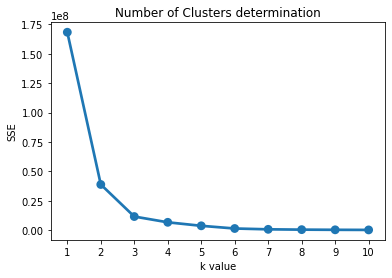

In [37]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=40)
    kmeans.fit(rfm_df)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('Number of Clusters determination')
plt.xlabel('k value')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

Number of clusters=3

Fitting the model on the dataset

In [38]:
model = KMeans(n_clusters=3, random_state=40)
model.fit(rfm_df)

KMeans(n_clusters=3, random_state=40)

Assigning clusters

In [39]:
rfm_df["Cluster"] = model.labels_
rfm_df.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12357.0,23,131,6207.67,0
12371.0,34,63,1887.96,2
12377.0,305,77,1628.12,2
12378.0,119,219,4008.62,0
12384.0,19,30,566.16,2


Counting number of customers in each cluster

In [40]:
rfm_df.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(1)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          56.2     160.2   4228.2     5
1          34.5     234.5   9995.2     2
2         126.1      43.4   1043.4    14

Normalizing the data

In [41]:
df_rfm = pd.DataFrame(rfm_df, columns=['Recency', 'Frequency', 'Monetary'])
df_rfm['ID'] = rfm_df.index
df_rfm['Cluster'] = model.labels_
df_rfm.head()

,Recency,Frequency,Monetary,ID,Cluster
CustomerID,,,,,
12357.0,23,131,6207.67,12357.0,0
12371.0,34,63,1887.96,12371.0,2
12377.0,305,77,1628.12,12377.0,2
12378.0,119,219,4008.62,12378.0,0
12384.0,19,30,566.16,12384.0,2


Preparing the data for visualisation using a snake plot

In [42]:
rfm = pd.melt(df_rfm.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','Monetary'],
                      var_name='Attribute',
                      value_name='Value')
rfm.head()

,ID,Cluster,Attribute,Value
0,12357.0,0,Recency,23.0
1,12371.0,2,Recency,34.0
2,12377.0,2,Recency,305.0
3,12378.0,0,Recency,119.0
4,12384.0,2,Recency,19.0


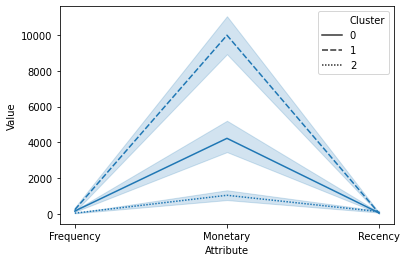

In [44]:
sns.lineplot('Attribute', 'Value',style='Cluster', data=rfm)

Cluster 1: Best customers

Cluster 2: Lost customers

Cluster 3: Potential customers